In [2]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf

In [5]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import torch
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
nifty50 = yf.download("^NSEI", start="2020-01-01", end="2024-01-01")

C:\Users\samkn\AppData\Local\Temp\ipykernel_22884\3882381510.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty50 = yf.download("^NSEI", start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [8]:
print(nifty50.head())

Price              Close          High           Low          Open  Volume
Ticker             ^NSEI         ^NSEI         ^NSEI         ^NSEI   ^NSEI
Date                                                                      
2020-01-01  12182.500000  12222.200195  12165.299805  12202.150391  304100
2020-01-02  12282.200195  12289.900391  12195.250000  12198.549805  407700
2020-01-03  12226.650391  12265.599609  12191.349609  12261.099609  428800
2020-01-06  11993.049805  12179.099609  11974.200195  12170.599609  396500
2020-01-07  12052.950195  12152.150391  12005.349609  12079.099609  447800


Text(0.5, 1.0, 'Nifty 50 Closing Prices')

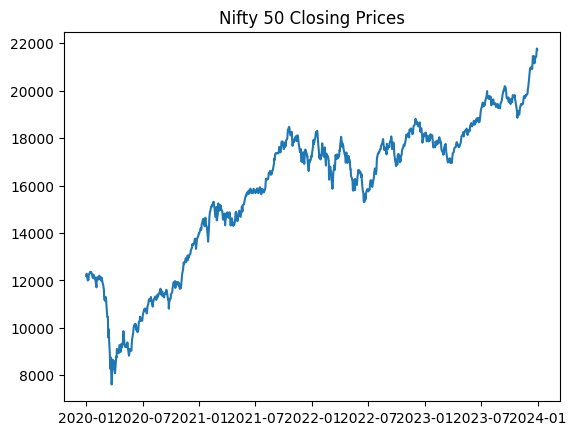

In [9]:
plt.plot(nifty50['Close'])
plt.title("Nifty 50 Closing Prices")

In [10]:
nifty50.dropna(inplace=True)

In [11]:
nifty50 = np.log(nifty50)

c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


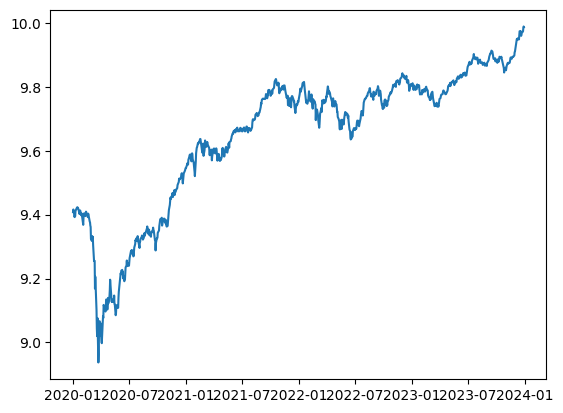

In [12]:
plt.plot(nifty50['Close'])

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

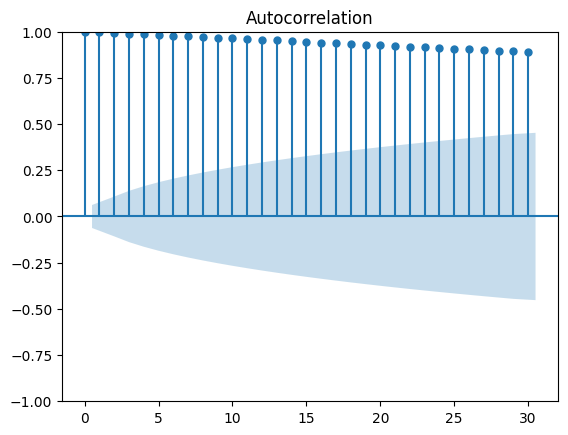

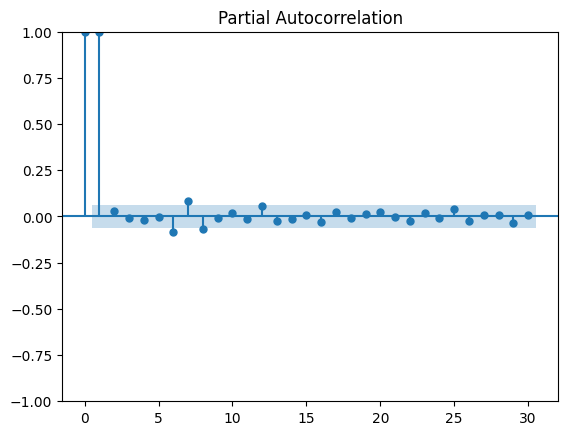

In [14]:
acf = plot_acf(nifty50['Close'])
pacf = plot_pacf(nifty50['Close'])

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(nifty50['Close'])
print('ADF Statistic:', result[0])

ADF Statistic: -0.6852035507886176


In [16]:
x_train = nifty50['Close'][:int(len(nifty50['Close'])*0.8)]
x_test = nifty50['Close'][int(len(nifty50['Close'])*0.8):]

Text(0.5, 1.0, 'Differenced Nifty 50 Closing Prices - Test Set')

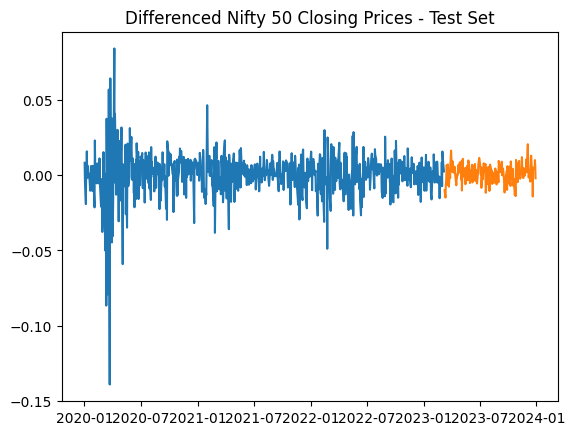

In [17]:
x_train_diff = x_train.diff(1).dropna()
x_test_diff = x_test.diff(1).dropna()
plt.plot(x_train_diff)
plt.title("Differenced Nifty 50 Closing Prices - Training Set")
plt.plot(x_test_diff)
plt.title("Differenced Nifty 50 Closing Prices - Test Set")

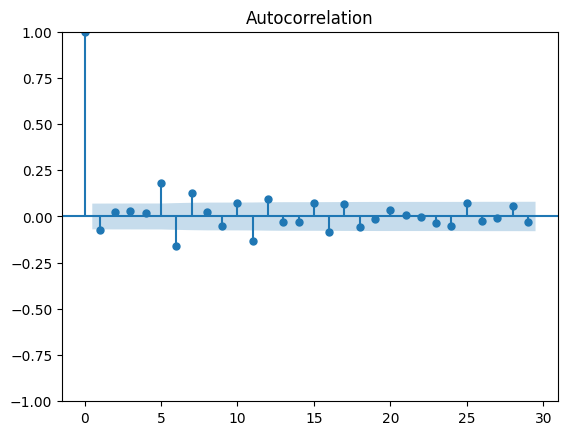

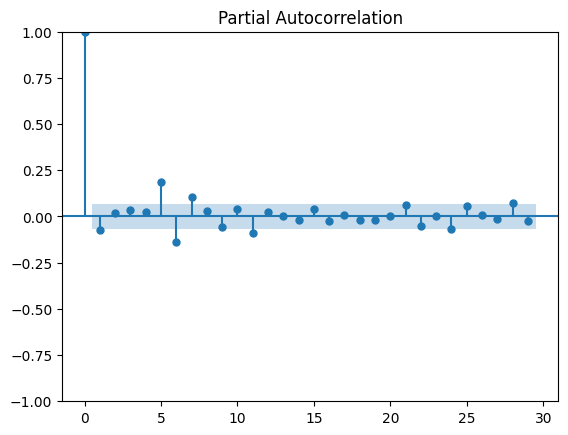

In [18]:
acf_train = plot_acf(x_train_diff)
pacf_train = plot_pacf(x_train_diff)

In [19]:
adf_x_train_diff = adfuller(x_train_diff)
print('ADF Statistic for Differenced Data:', adf_x_train_diff[0])

ADF Statistic for Differenced Data: -8.16205081775001


In [20]:
import pmdarima as pm
auto_model = pm.auto_arima(x_train, stepwise=False, seasonal=False, trace=True)
print(auto_model.summary())

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4499.276, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4501.323, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4499.880, Time=0.71 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-4498.948, Time=0.87 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-4498.398, Time=1.73 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-4517.091, Time=1.84 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4501.514, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4499.637, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4497.840, Time=0.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4504.050, Time=1.39 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-4500.214, Time=1.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4499.754, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4497.790, Time=1.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4495.820, Time=1.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-4502.873, Time=1.26

In [21]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(x_train, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  ^NSEI   No. Observations:                  792
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2268.191
Date:                Wed, 31 Dec 2025   AIC                          -4524.381
Time:                        19:08:47   BIC                          -4496.342
Sample:                             0   HQIC                         -4513.604
                                - 792                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0765      0.024     -3.188      0.001      -0.124      -0.029
ar.L2          0.0147      0.016      0.902      0.367      -0.017       0.047
ar.L3          0.0332      0.019      1.742      0.0

In [22]:
print(list(model_fit.forecast(steps=len(x_test))))

[9.786122831332769, 9.785449583772019, 9.788787579787956, 9.789916622980627, 9.790377362950068, 9.790769267536664, 9.79078458994897, 9.791473710084686, 9.79166359270421, 9.791761067415216, 9.79185340332161, 9.791883237396323, 9.792022061750348, 9.79205428267192, 9.792076654011021, 9.792098488533217, 9.792109108347304, 9.79213663035002, 9.792142303417835, 9.79214765579174, 9.792152745230117, 9.792155664740923, 9.792161073093968, 9.792162139597634, 9.79216343259497, 9.792164595140305, 9.792165314547264, 9.792166374754775, 9.79216659220678, 9.792166901936753, 9.792167162184452, 9.792167329432298, 9.7921675379248, 9.792167585680776, 9.792167658674222, 9.792167715917603, 9.792167753521616, 9.792167794842639, 9.79216780587788, 9.792167822765988, 9.792167835181456, 9.792167843476147, 9.792167851757219, 9.79216785437218, 9.792167858210894, 9.792167860876127, 9.792167862687272, 9.792167864368562, 9.79216786499203, 9.792167865850953, 9.792167866419303, 9.792167866813019, 9.792167867158952, 9.792

c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\Users\samkn\.conda\envs\cleanenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

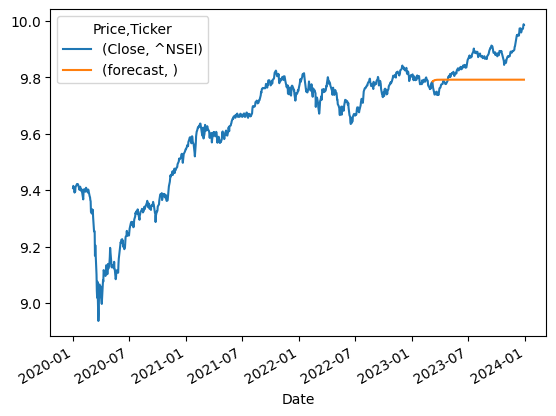

In [23]:
forecast = model_fit.forecast(steps=len(x_test))
nifty50['forecast'] = [None]*len(x_train) + list(forecast)
nifty50.plot(y=['Close', 'forecast'])


<Axes: xlabel='Date'>

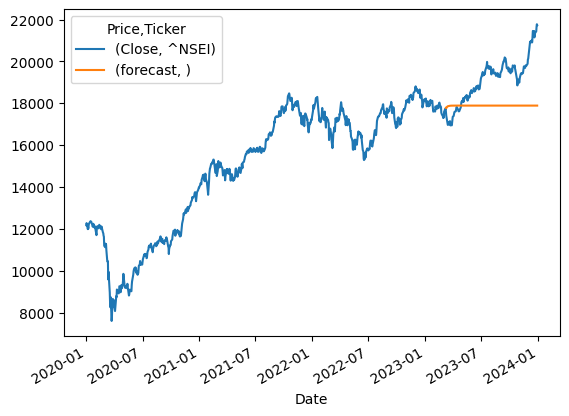

In [24]:
nifty50['forecast']= np.exp(nifty50['forecast'])
nifty50['Close']= np.exp(nifty50['Close'])
nifty50.plot(y=['Close', 'forecast'])

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
mse = mean_squared_error(np.exp(x_test), nifty50['forecast'][len(x_train):])
mae = mean_absolute_error(np.exp(x_test), nifty50['forecast'][len(x_train):])
rmse = root_mean_squared_error(np.exp(x_test), nifty50['forecast'][len(x_train):])
print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

MSE: 2741540.0378070283, MAE: 1411.3619870134582, RMSE: 1655.7596558096916
